In [ ]:
import glob
from aenet.featurize import AenetAUCFeaturizer

# the AUC featurizer uses the Chebyshev method (Artrith 2017)
fzer = AenetAUCFeaturizer(['Ti', 'O'],
                          rad_cutoff=6.0, rad_order=10, 
                          ang_cutoff=4.0, ang_order=3)

# aenet's generate.x will be run in the specified subdirectory ('run').
# If no work directory is given, a temporary directory is created and
# removed after completion.
fzer.run_aenet_generate(glob.glob("./xsf-TiO2/*.xsf"), 
                        atomic_energies={
                            'O': -432.503149303,
                            'Ti': -1604.604515075},
                        workdir='run')

In [3]:
from aenet.mlip import ANNPotential, TrainingConfig, Adam

arch = {
    'Ti': [(10, 'gelu'), (10, 'gelu')],
    'O': [(10, 'gelu'), (10, 'gelu')]
}

mlp = ANNPotential(arch)

config = TrainingConfig(
    iterations=100,
    method=Adam(mu=0.001, batchsize=8, samplesize=100),
    sampling='random',
    max_energy=1.0,
    save_energies=True,
    testpercent=10
)

mlp.train(config=config, workdir='run')

Training: 100%|███████████████████████████████| 100/100 [00:20<00:00,  5.00it/s]


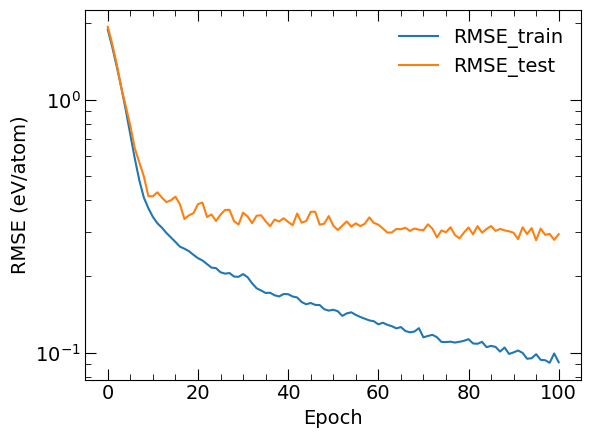

In [4]:
from aenet.io.train import TrainOutput
to = TrainOutput('train.out')
to.plot_training_errors()

In [5]:
print(to)

Training statistics:
  final_MAE_train: 0.05630424
  final_RMSE_train: 0.09153436
  final_MAE_test: 0.2050311
  final_RMSE_test: 0.293765
  min_RMSE_test: 0.2778481
  epoch_min_RMSE_test: 96



In [ ]:
from aenet.io.train import Energies
E = Energies('./energies.train.0', './energies.test.0')

In [ ]:
E.plot_correlation()